# Rural and Remote Areas Admission Analysis
This notebook provides a deep dive into students from Rural and Remote-Underdeveloped clusters, focusing on gender performance, district trends, and college distribution. Useful for education policy makers and planners.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_excel('cleaned_clustered_admissions(15).xlsx')

df.head()

,no,formid,index_no,name,ge,uace_,dcode,dname,course_code,course_name,tot_wt,program_name,cluster,region,college
0,1,25APF900350094290048,U2789/905,Nimusiima Sandrah,F,2024,55.0,WAKISO,ACC,BSC. Accounting (EVE),42.7,BSC. Accounting (EVE),URBAN-CITY,CENTRAL,COBAMS
1,2,25APF561140686250786,U0025/529,Bulukuku Daniel Ephraim,M,2014,93.0,KIBUKU,ACC,BSC. Accounting (EVE),42.3,BSC. Accounting (EVE),RURAL-AGRICULTURAL,EASTERN,COBAMS
2,3,25APF530278631275455,U2977/518,Mirembe Elizabeth,F,2024,16.0,KAMPALA,ACC,BSC. Accounting (EVE),41.1,BSC. Accounting (EVE),URBAN-CITY,CENTRAL,COBAMS
3,4,25APF1346250173272930,U1664/712,Namata Martha,F,2024,33.0,MASAKA,ACC,BSC. Accounting (EVE),40.7,BSC. Accounting (EVE),URBAN-CITY,CENTRAL,COBAMS
4,5,25APF1553620758303031,U0004/754,Nakalema Joyce,F,2024,33.0,MASAKA,ACC,BSC. Accounting (EVE),40.3,BSC. Accounting (EVE),URBAN-CITY,CENTRAL,COBAMS


## Gender Distribution

C:\Users\User\AppData\Local\Temp\ipykernel_8624\3944449054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ge', palette='Set2')


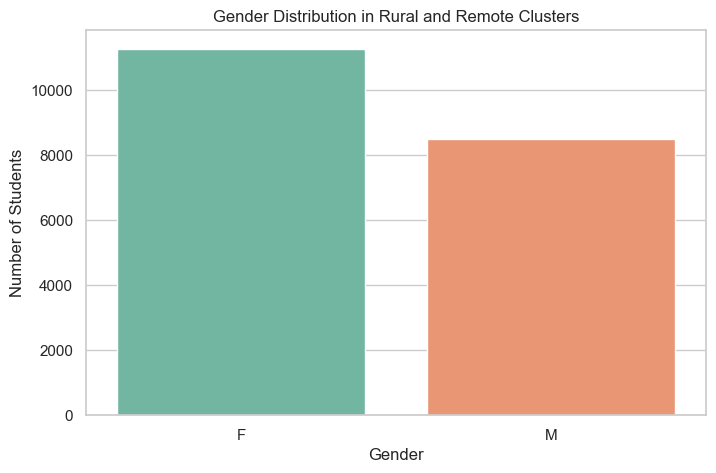

In [3]:
sns.set(style='whitegrid')
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='ge', palette='Set2')
plt.title('Gender Distribution in Rural and Remote Clusters')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8624\422721069.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


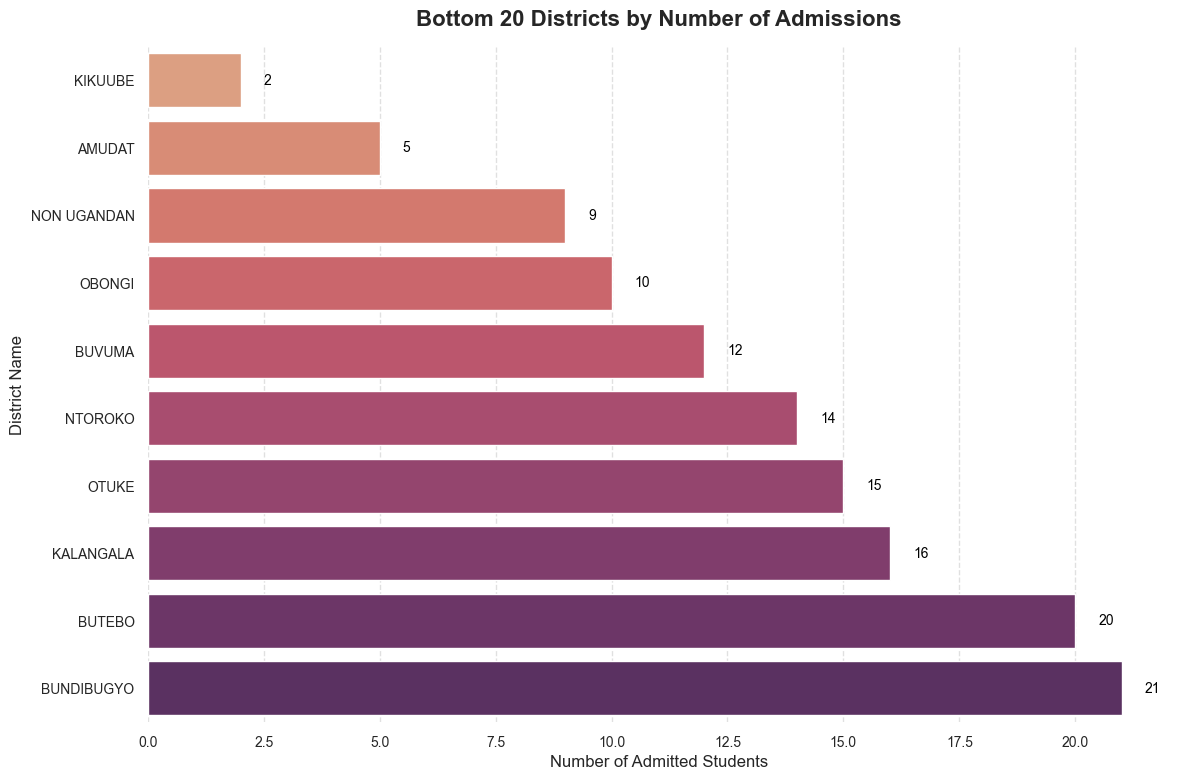

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize and clean district names
df['dname'] = df['dname'].astype(str).str.strip().str.upper()

# Set aesthetic style
sns.set(style='whitegrid', font_scale=1.1)

# Get bottom 20 districts by admission count
least_favoured = df['dname'].value_counts().nsmallest(10).sort_values()

# Plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x=least_favoured.values, 
    y=least_favoured.index, 
    palette='flare'
)

# Add annotations on bars
for index, value in enumerate(least_favoured.values):
    barplot.text(value + 0.5, index, str(int(value)), va='center', fontsize=10, color='black')

# Titles and labels
plt.title('Bottom 20 Districts by Number of Admissions', fontsize=16, weight='bold', pad=15)
plt.xlabel('Number of Admitted Students', fontsize=12)
plt.ylabel('District Name', fontsize=12)

# Style tweaks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


## Gender-wise Average Performance

C:\Users\User\AppData\Local\Temp\ipykernel_8624\1969087580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_perf, x='ge', y='tot_wt', palette='coolwarm')


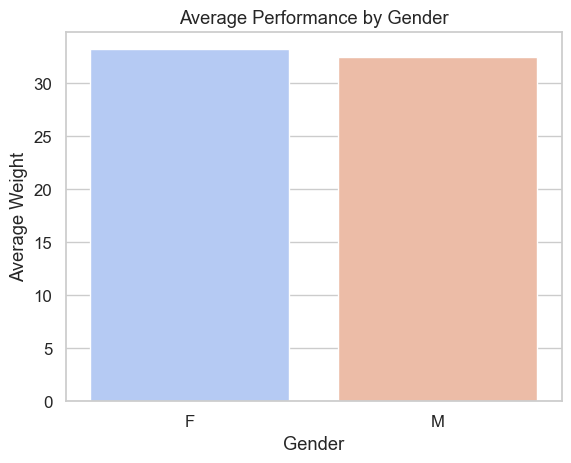

In [5]:
avg_perf = df.groupby('ge')['tot_wt'].mean().reset_index()
sns.barplot(data=avg_perf, x='ge', y='tot_wt', palette='coolwarm')
plt.title('Average Performance by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Weight')
plt.show()

## Top 10 Districts (by Student Count)

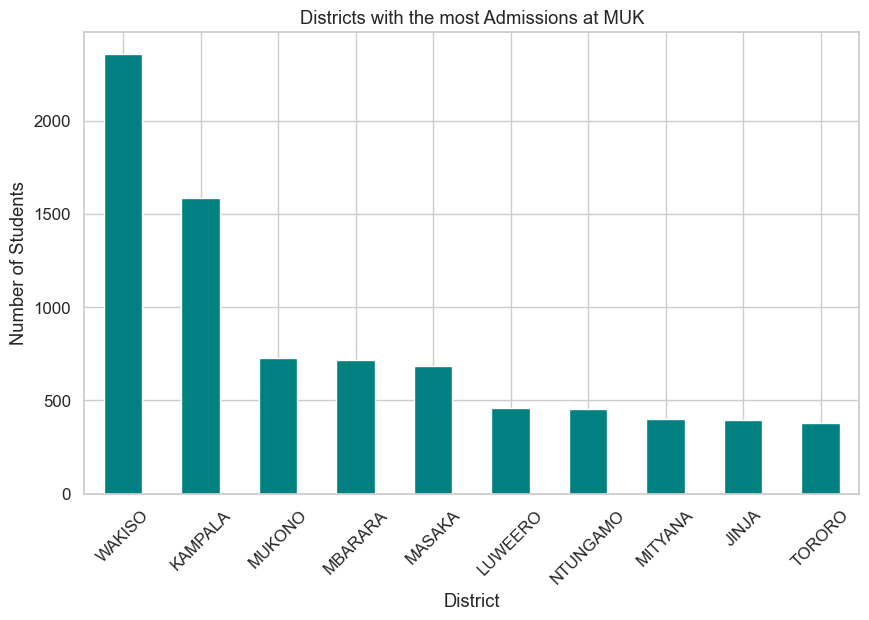

In [6]:
top_districts = df['dname'].value_counts().head(10)
top_districts.plot(kind='bar', figsize=(10,6), color='teal')
plt.title('Districts with the most Admissions at MUK')
plt.ylabel('Number of Students')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.show()

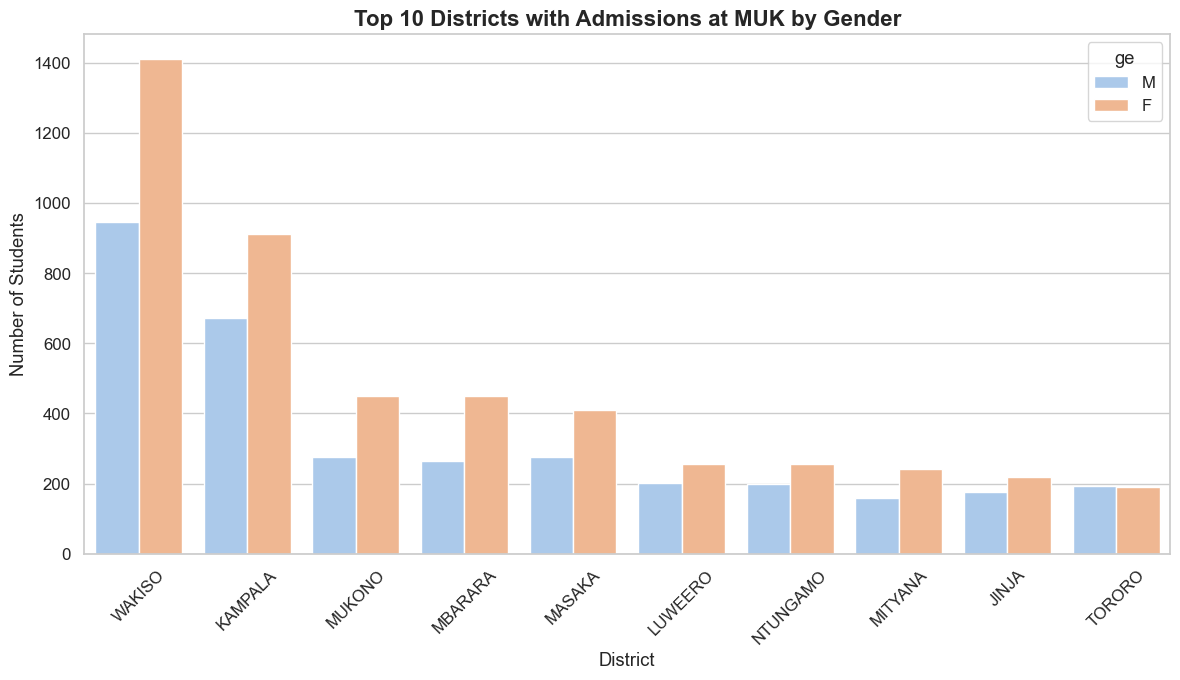

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set plot style
sns.set(style="whitegrid", font_scale=1.1)

# Identify top 10 districts by total admissions
top_districts = df['dname'].value_counts().head(10).index

# Filter data to include only those districts
filtered_df = df[df['dname'].isin(top_districts)]

# Group by district and gender
gender_counts = filtered_df.groupby(['dname', 'ge']).size().reset_index(name='count')

# Sort districts in consistent order
gender_counts['dname'] = pd.Categorical(gender_counts['dname'], categories=top_districts, ordered=True)
gender_counts = gender_counts.sort_values('dname')

# Plot grouped bar chart
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=gender_counts,
    x='dname',
    y='count',
    hue='ge',
    palette='pastel'
)

# Labels and title
plt.title('Top 10 Districts with Admissions at MUK by Gender', fontsize=16, weight='bold')
plt.ylabel('Number of Students')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.legend(title='ge')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\1245795425.py:37: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


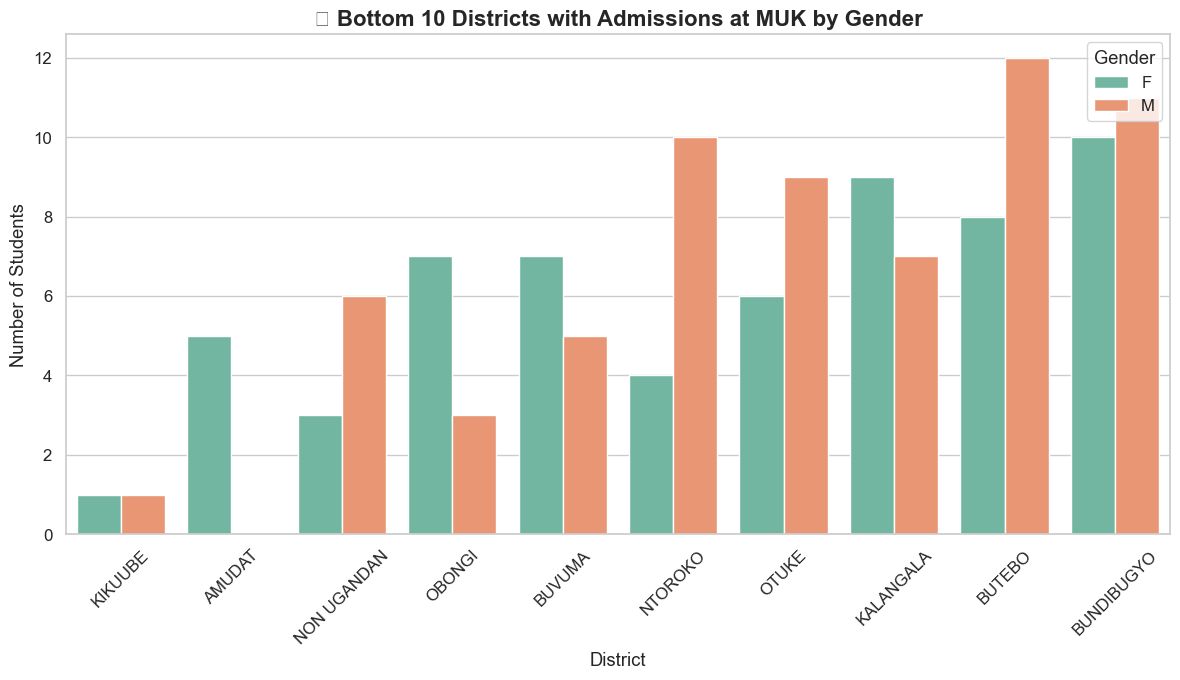

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style="whitegrid", font_scale=1.1)

# Identify bottom 10 districts by total admissions
bottom_districts = df['dname'].value_counts().nsmallest(10).index

# Filter dataset
filtered_bottom = df[df['dname'].isin(bottom_districts)]

# Group by district and gender
gender_bottom = filtered_bottom.groupby(['dname', 'ge']).size().reset_index(name='count')

# Sort districts to maintain order in plot
gender_bottom['dname'] = pd.Categorical(gender_bottom['dname'], categories=bottom_districts, ordered=True)
gender_bottom = gender_bottom.sort_values('dname')

# Plot grouped bar chart
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=gender_bottom,
    x='dname',
    y='count',
    hue='ge',
    palette='Set2'
)

# Titles and labels
plt.title('📉 Bottom 10 Districts with Admissions at MUK by Gender', fontsize=16, weight='bold')
plt.xlabel('District')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()


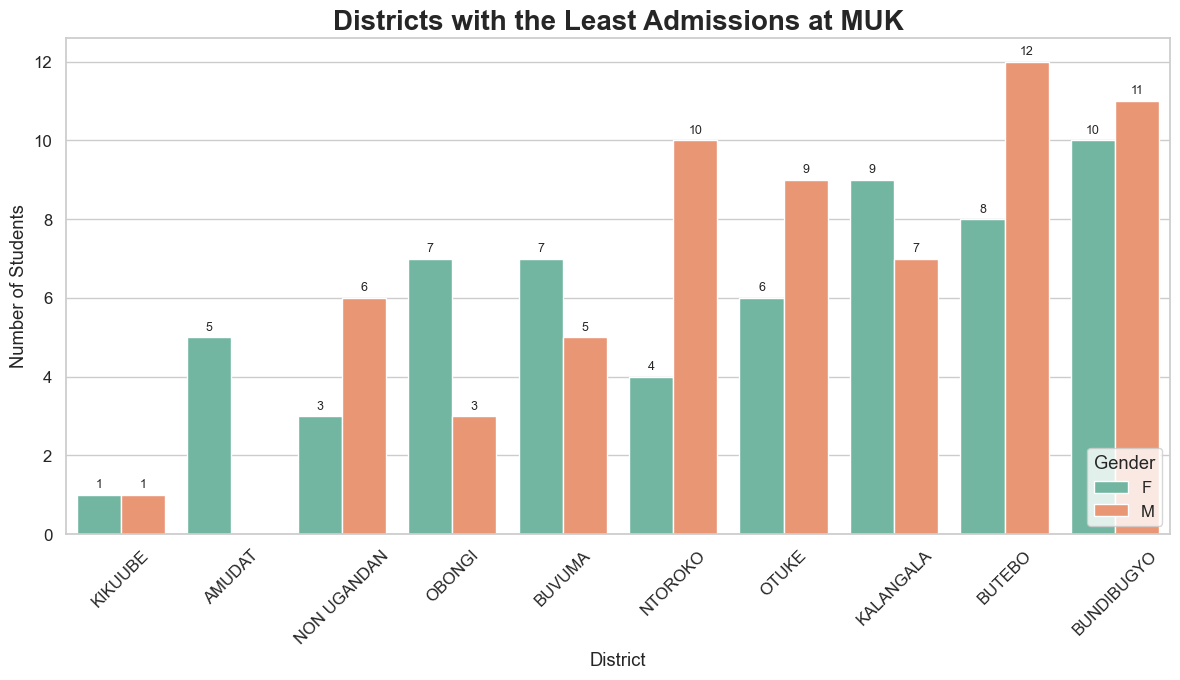

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set(style="whitegrid", font_scale=1.1)

# Get bottom 10 districts by total admissions
bottom_districts = df['dname'].value_counts().nsmallest(10).index

# Filter dataset
filtered_bottom = df[df['dname'].isin(bottom_districts)]

# Group by district and gender
gender_bottom = (
    filtered_bottom
    .groupby(['dname', 'ge'])
    .size()
    .reset_index(name='count')
)

# Sort districts
gender_bottom['dname'] = pd.Categorical(gender_bottom['dname'], categories=bottom_districts, ordered=True)
gender_bottom = gender_bottom.sort_values('dname')

# Plot
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    data=gender_bottom,
    x='dname',
    y='count',
    hue='ge',
    palette='Set2'
)

# Add value labels on bars
for bar in barplot.patches:
    height = bar.get_height()
    if height > 0:
        barplot.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.1,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=9
        )

# Titles and labels
plt.title('Districts with the Least Admissions at MUK', fontsize=20, weight='bold')
plt.xlabel('District')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='lower right')
plt.tight_layout()
plt.show()


## Districts with Highest Average Performance

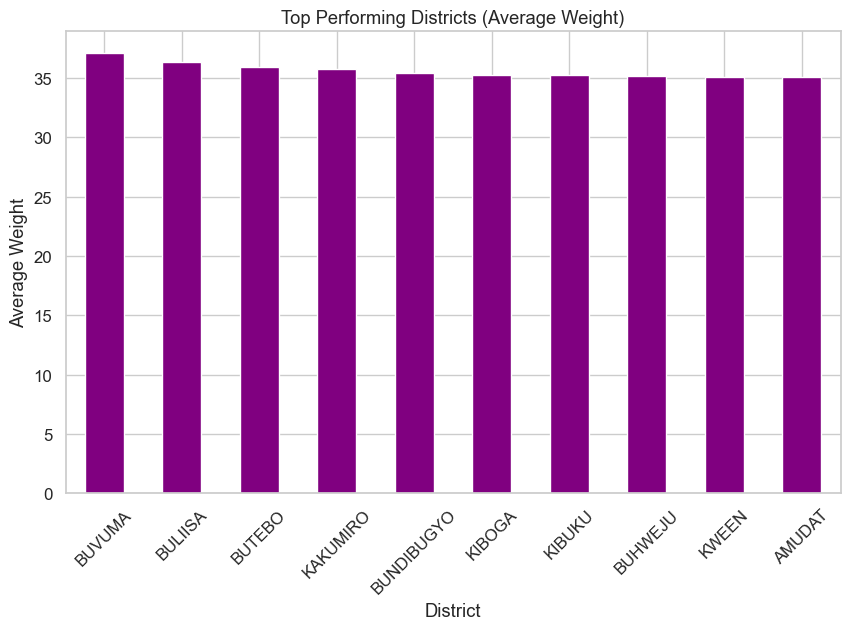

In [10]:
district_perf = df.groupby('dname')['tot_wt'].mean().sort_values(ascending=False).head(10)
district_perf.plot(kind='bar', figsize=(10,6), color='purple')
plt.title('Top Performing Districts (Average Weight)')
plt.ylabel('Average Weight')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.show()

## College Preferences of Rural & Remote Students

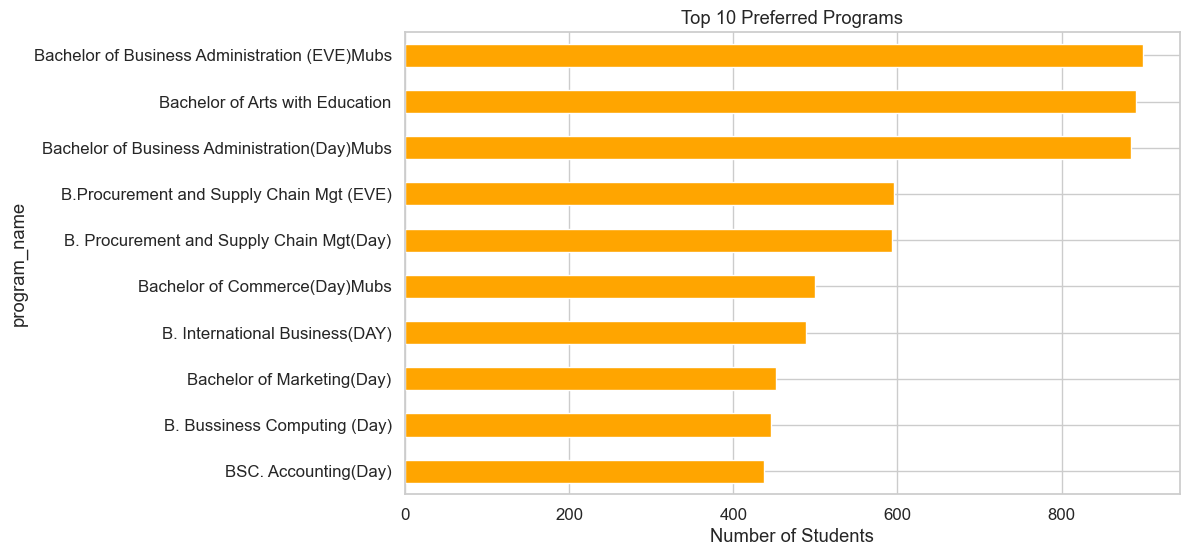

In [11]:
college_pref = df['program_name'].value_counts().head(10)
college_pref.plot(kind='barh', figsize=(10,6), color='orange')
plt.title('Top 10 Preferred Programs')
plt.xlabel('Number of Students')
plt.gca().invert_yaxis()
plt.show()

## Interactive Gender vs Program Heatmap

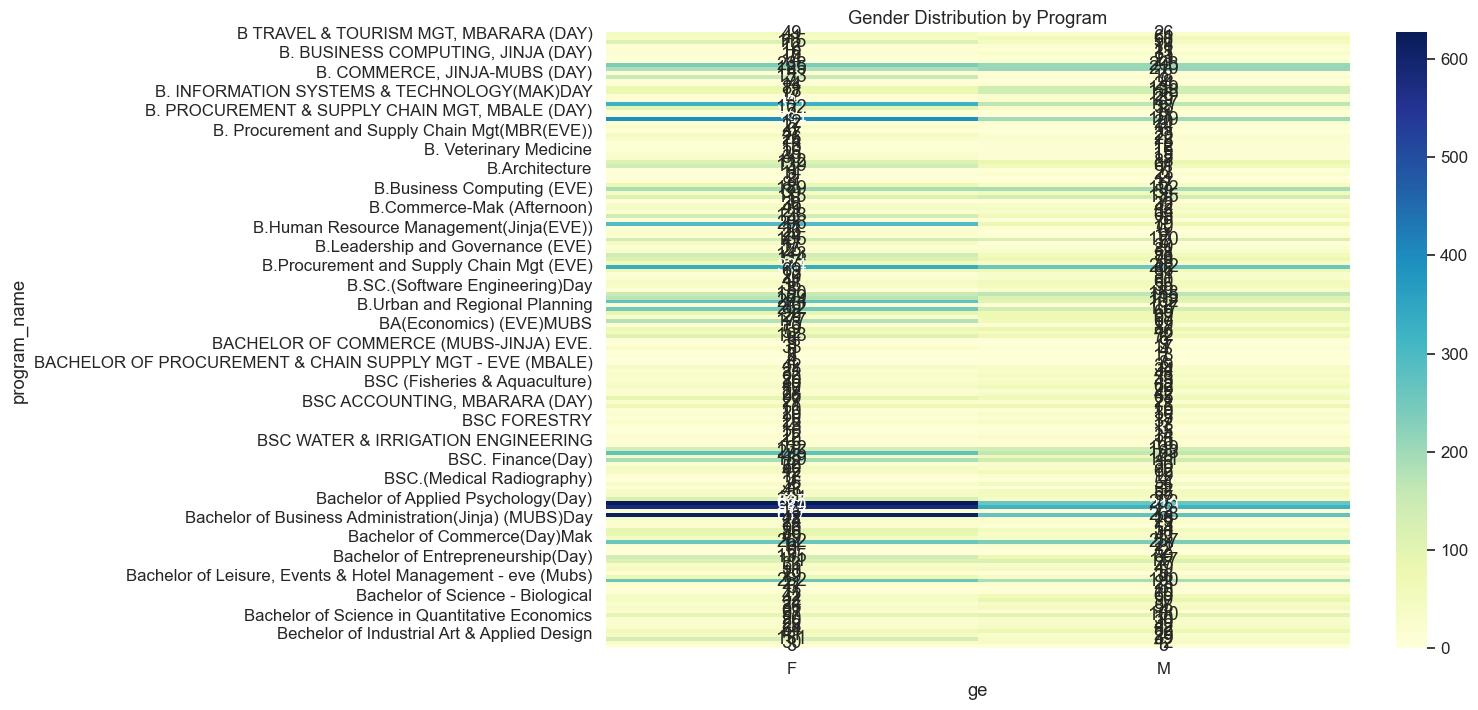

In [12]:
cross = df.groupby(['program_name', 'ge']).size().unstack().fillna(0)
plt.figure(figsize=(12,8))
sns.heatmap(cross, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Gender Distribution by Program')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_8624\25569456.py:25: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  plt.tight_layout()


<Figure size 1200x700 with 0 Axes>

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


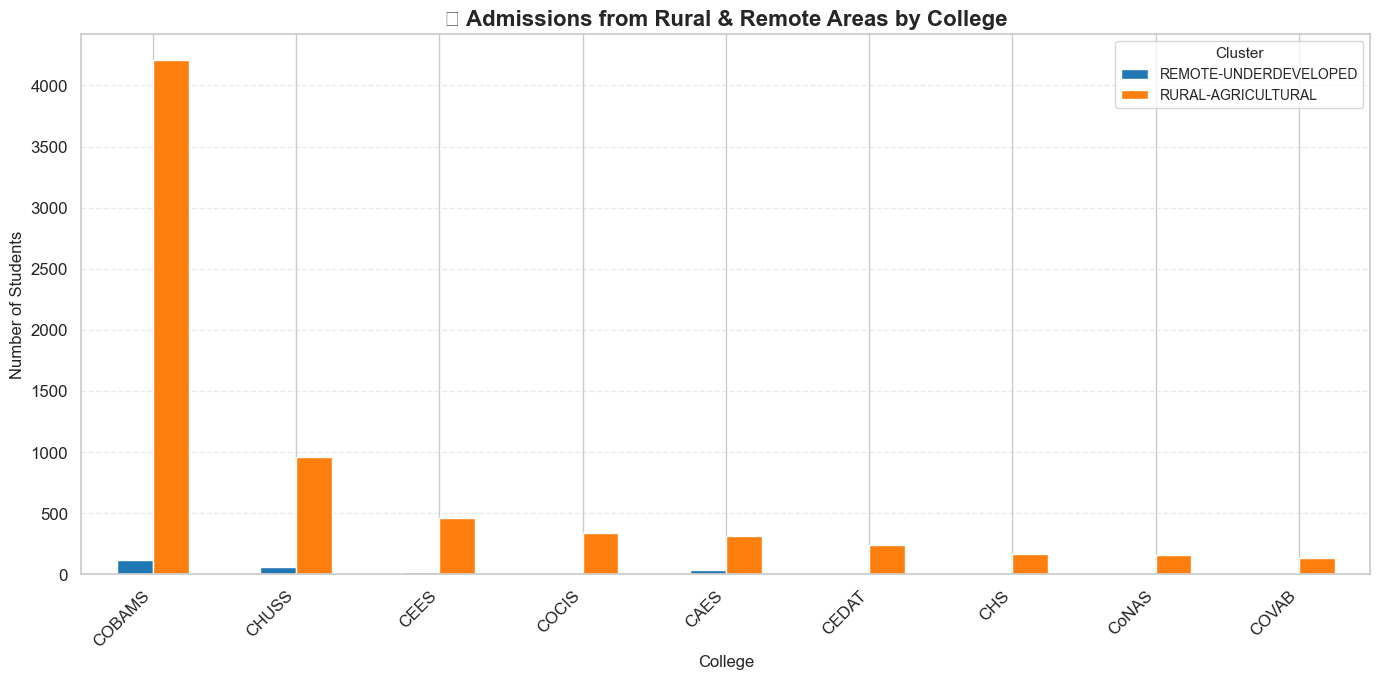

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter to only rural and remote students
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Count by college and cluster
college_cluster_counts = rural_remote_df.groupby(['college', 'cluster']).size().unstack(fill_value=0)

# Sort by total admissions to highlight major colleges
college_cluster_counts['Total'] = college_cluster_counts.sum(axis=1)
college_cluster_counts = college_cluster_counts.sort_values('Total', ascending=False).drop(columns='Total')

# Plot
plt.figure(figsize=(12, 7))
college_cluster_counts.plot(kind='bar', stacked=False, figsize=(14, 7), color=['#1f77b4', '#ff7f0e'])

# Aesthetics
plt.title("🎓 Admissions from Rural & Remote Areas by College", fontsize=16, weight='bold')
plt.xlabel("College", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend(title="Cluster", fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\1532557435.py:24: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


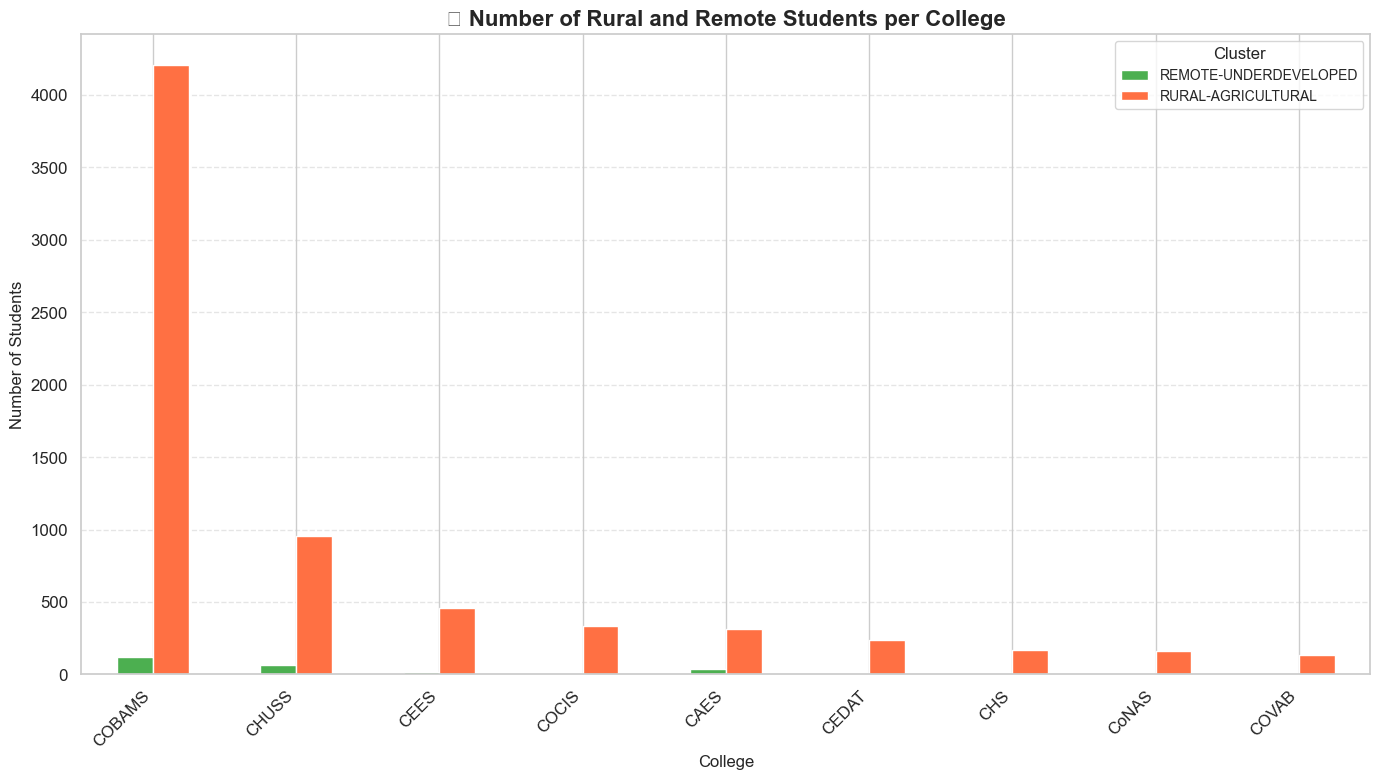

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rural and remote students
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Group by college and cluster, then count
college_counts = rural_remote_df.groupby(['college', 'cluster']).size().unstack(fill_value=0)

# Sort by total students in rural + remote
college_counts['Total'] = college_counts.sum(axis=1)
college_counts = college_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot
plt.figure(figsize=(14, 8))
college_counts.plot(kind='bar', stacked=False, color=['#4CAF50', '#FF7043'], figsize=(14, 8))

plt.title('🎓 Number of Rural and Remote Students per College', fontsize=16, weight='bold')
plt.xlabel('College', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster', title_fontsize=12, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<Figure size 1400x900 with 0 Axes>

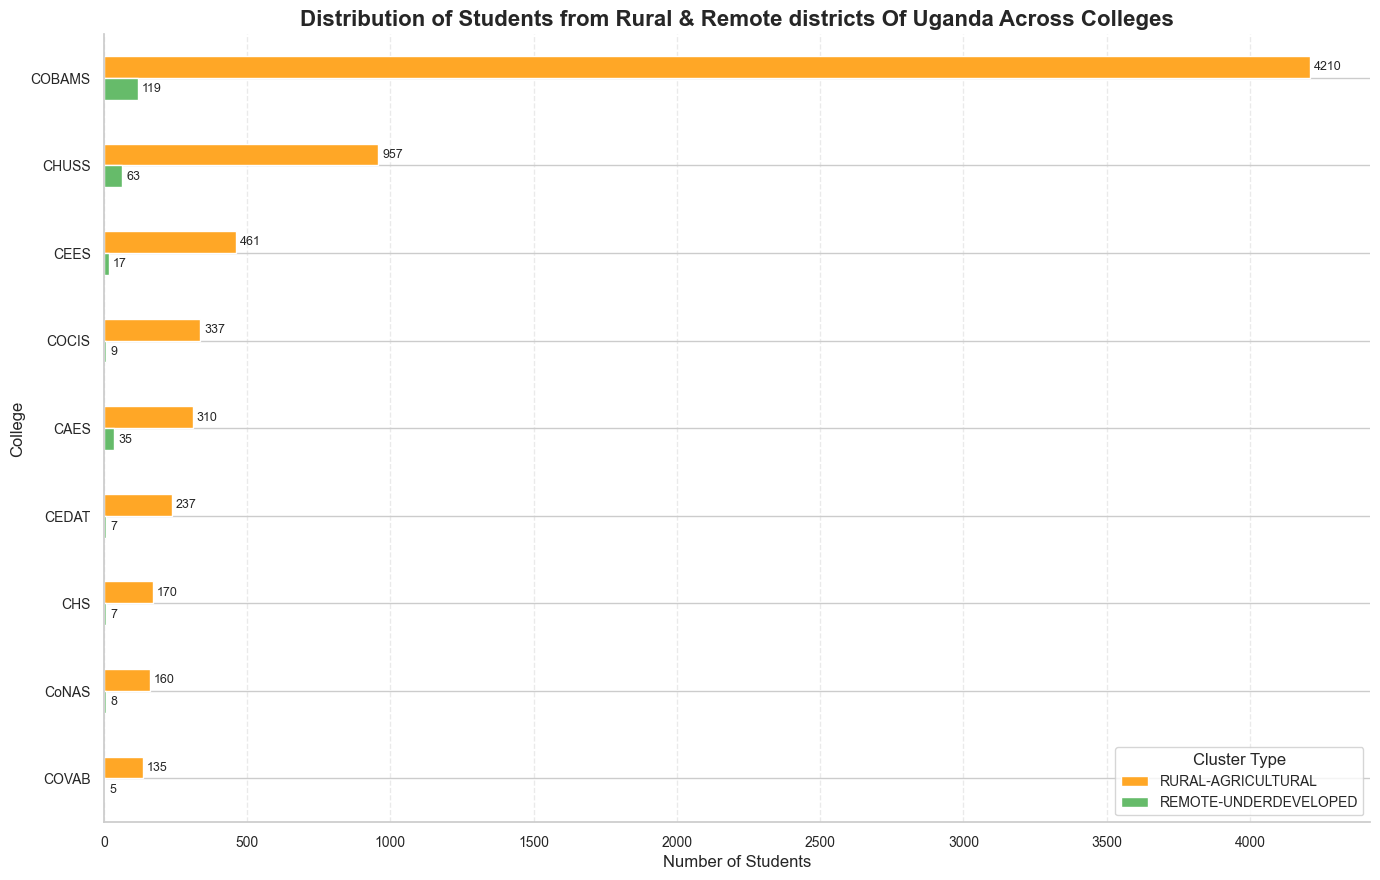

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter rural and remote students
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Group and pivot
college_counts = rural_remote_df.groupby(['college', 'cluster']).size().unstack(fill_value=0)

# Ensure column order: RURAL on top, REMOTE below
college_counts = college_counts[['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED']]

# Sort by total and drop total column
college_counts['Total'] = college_counts.sum(axis=1)
college_counts = college_counts.sort_values('Total', ascending=False).drop(columns='Total')

# Plot grouped bar chart
plt.figure(figsize=(14, 9))
ax = college_counts.plot(
    kind='barh',
    stacked=False,
    color=['#FFA726','#66BB6A'],  # Rural: green, Remote: orange
    figsize=(14, 9)
)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9)

# Customize
plt.title('Distribution of Students from Rural & Remote districts Of Uganda Across Colleges', fontsize=16, weight='bold')
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('College', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.gca().invert_yaxis()
sns.despine()

# Set legend to bottom right
plt.legend(
    title='Cluster Type',
    fontsize=10,
    title_fontsize=12,
    loc='lower right',
    bbox_to_anchor=(1, 0)
)

plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


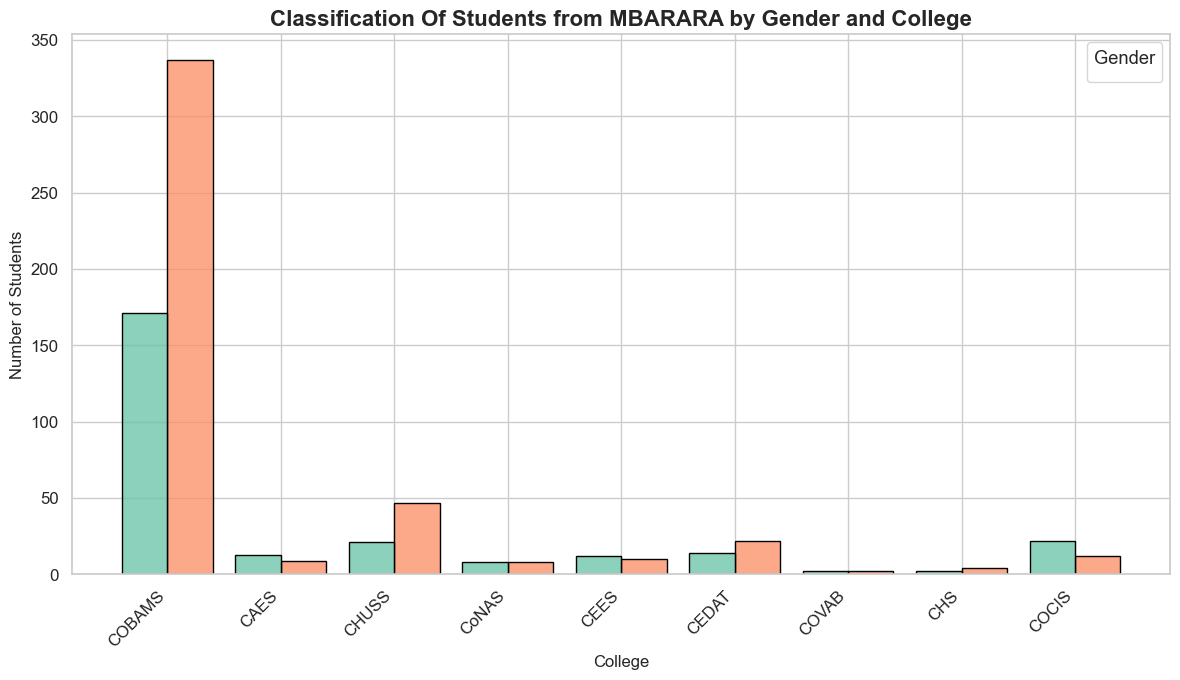

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter MBARARA students
mbarara_df = df[df['dname'].str.upper() == 'MBARARA']

# Set plot style
sns.set(style="whitegrid", font_scale=1.1)

# Plot histogram (bar plot grouped by gender and college)
plt.figure(figsize=(12, 7))
sns.histplot(
    data=mbarara_df,
    x='college',
    hue='ge',
    multiple='dodge',
    shrink=0.8,
    palette='Set2',
    edgecolor='black',
    discrete=True
)

# Titles and labels
plt.title('Classification Of Students from MBARARA by Gender and College', fontsize=16, weight='bold')
plt.xlabel('College', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)

# Customize
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\1444065154.py:32: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


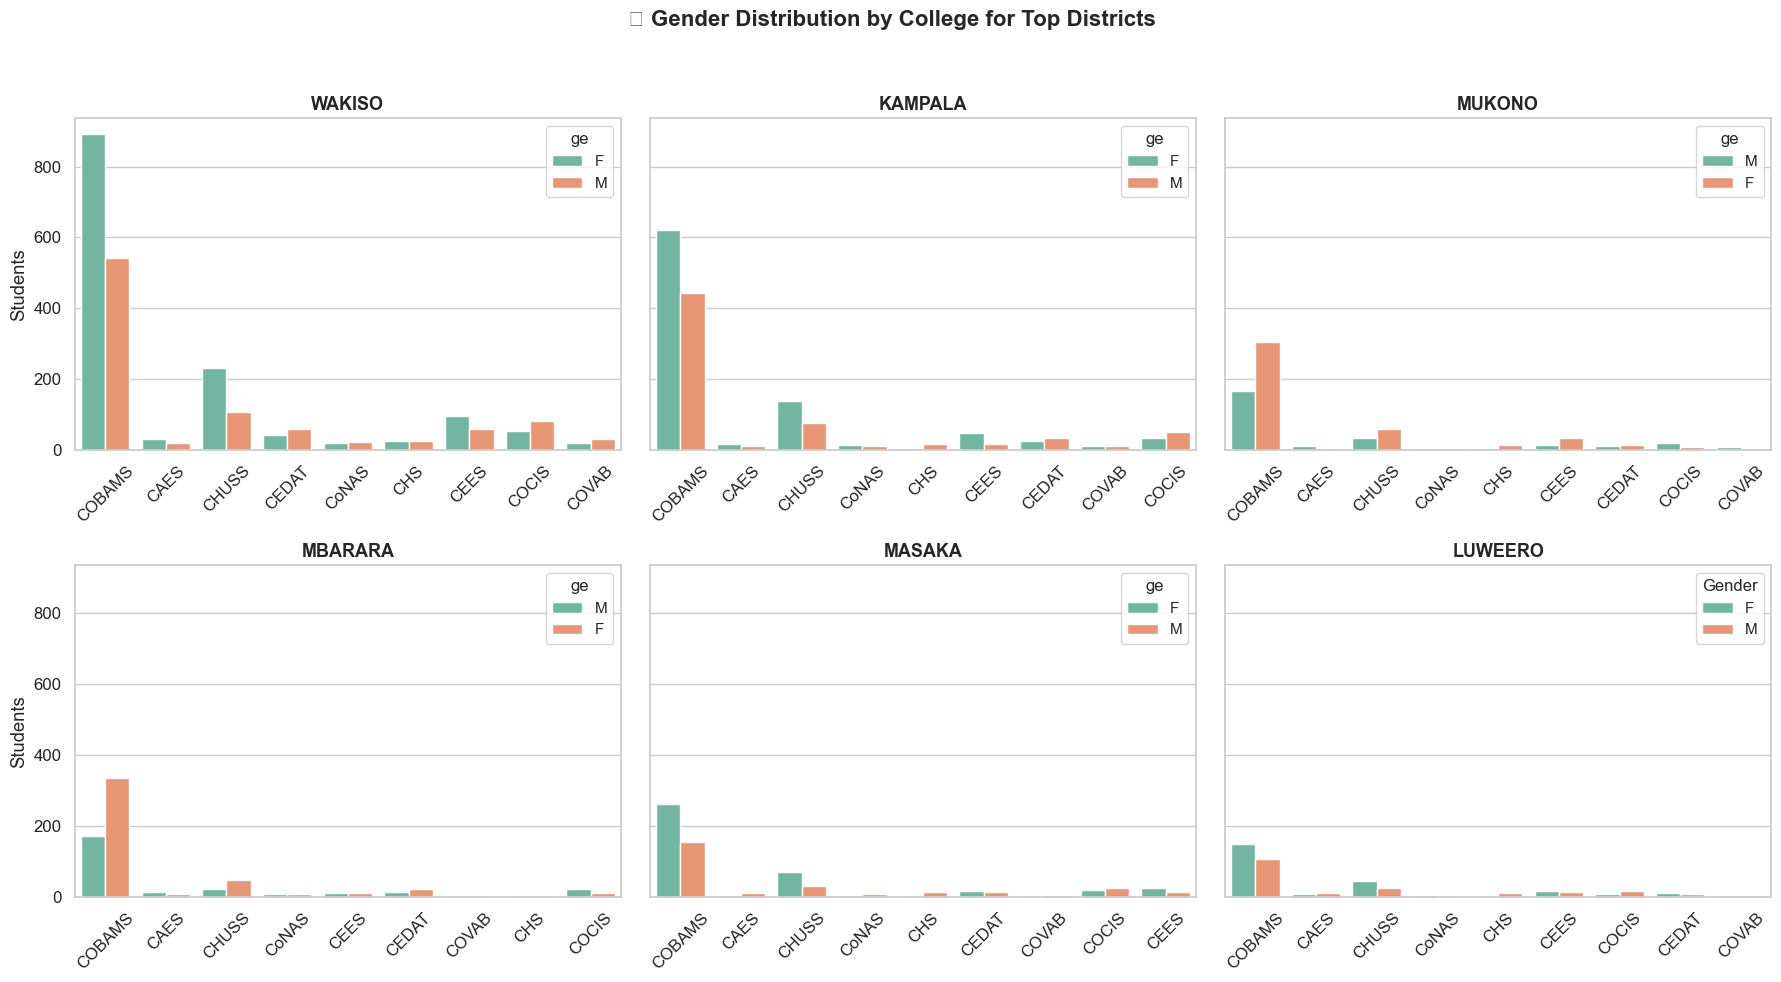

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 6 districts by number of students
top_districts = df['dname'].value_counts().head(6).index.tolist()

# Filter to those districts
top_df = df[df['dname'].isin(top_districts)]

# Set up subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
axes = axes.flatten()

sns.set(style="whitegrid", font_scale=1)

# Plot each district
for i, district in enumerate(top_districts):
    sub_df = top_df[top_df['dname'] == district]
    sns.countplot(
        data=sub_df,
        x='college',
        hue='ge',
        palette='Set2',
        ax=axes[i]
    )
    axes[i].set_title(f"{district}", fontsize=13, weight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Students')
    axes[i].tick_params(axis='x', rotation=45)

plt.suptitle("📊 Gender Distribution by College for Top Districts", fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.legend(title='Gender')
plt.show()


In [18]:
%pip install nbformat

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
import plotly.express as px
import pandas as pd

# Filter relevant columns
filtered_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])].copy()
filtered_df = filtered_df[filtered_df['college'].notna() & filtered_df['dname'].notna()]

# List of unique districts
districts = sorted(filtered_df['dname'].unique())

# Initial figure for the first district
initial_district = districts[0]
fig = px.histogram(
    filtered_df[filtered_df['dname'] == initial_district],
    x='college',
    color='ge',
    barmode='group',
    title=f'Gender Distribution by College for {initial_district}',
    color_discrete_sequence=px.colors.qualitative.Set2
)

# Create dropdown buttons
dropdown_buttons = []
for district in districts:
    filtered = filtered_df[filtered_df['dname'] == district]
    hist = px.histogram(
        filtered,
        x='college',
        color='ge',
        barmode='group',
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    dropdown_buttons.append(dict(
        method='restyle',
        label=district,
        args=[
            {'x': [filtered['college']],
             'type': 'histogram'},
            [0]
        ],
    ))

# Update figure layout with dropdown
fig.update_layout(
    updatemenus=[dict(
        active=0,
        buttons=dropdown_buttons,
        x=1.2,
        y=1.15,
        xanchor='right',
        yanchor='top'
    )],
    title='👥 Gender Distribution by College (Select District)',
    xaxis_title='College',
    yaxis_title='Number of Students',
    legend_title='Gender',
    height=500
)

fig.show()


In [20]:
%pip install nbformat --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [27]:
import plotly.express as px

districts = df['dname'].dropna().unique()

fig = px.histogram(
    df[df['dname'] == districts[0]],  # default
    x='college',
    color='ge',
    barmode='group',
    title='Gender Distribution per College - Interactive'
)

fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label=d,
                     method='update',
                     args=[
                         {'x': [df[df['dname'] == d]['college']],
                          'y': [df[df['dname'] == d]['ge']],
                          'type': 'histogram'},
                         {'title': f'Gender Distribution in {d}'}
                     ]) for d in districts
            ],
            direction="down"
        )
    ]
)
fig.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8624\1920847847.py:39: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from current font.



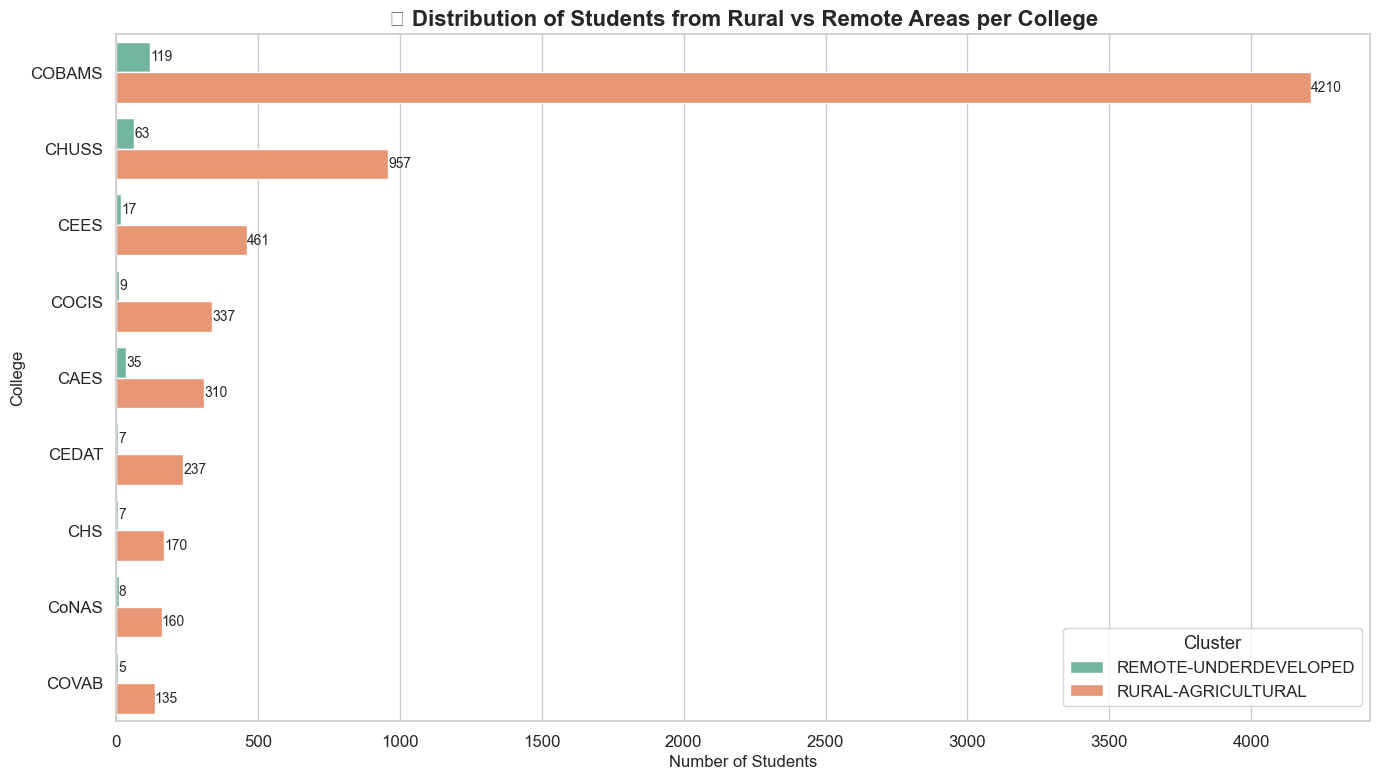

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter data
rural_remote_df = df[df['cluster'].isin(['RURAL-AGRICULTURAL', 'REMOTE-UNDERDEVELOPED'])]

# Group and count
college_counts = rural_remote_df.groupby(['college', 'cluster']).size().reset_index(name='count')

# Sort colleges by total count (for consistent ordering)
sorted_colleges = college_counts.groupby('college')['count'].sum().sort_values(ascending=False).index
college_counts['college'] = pd.Categorical(college_counts['college'], categories=sorted_colleges, ordered=True)

# Plot
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid", font_scale=1.1)
barplot = sns.barplot(
    data=college_counts,
    x='count',
    y='college',
    hue='cluster',
    palette='Set2'
)

# Titles and labels
plt.title('🎓 Distribution of Students from Rural vs Remote Areas per College', fontsize=16, weight='bold')
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('College', fontsize=12)

# Annotate bars
for p in barplot.patches:
    width = p.get_width()
    if width > 0:
        barplot.text(width + 1, p.get_y() + p.get_height() / 2, int(width), va='center', fontsize=10)

# Legend at bottom right
plt.legend(title='Cluster', loc='lower right', bbox_to_anchor=(1.0, 0.01))
plt.tight_layout()
plt.show()


In [22]:
import plotly.express as px
import pandas as pd

# Group and count admissions per district and region
region_district_counts = df.groupby(['region', 'dname']).size().reset_index(name='admissions')

# Create the treemap
fig = px.treemap(
    region_district_counts,
    path=['region', 'dname'],  # Hierarchical levels: Region > District
    values='admissions',
    color='region',
    title='📦 Admissions Treemap: Districts by Region',
    color_discrete_sequence=px.colors.qualitative.Set3  # You can try other color sets like Set2, Pastel1, etc.
)

# Display the treemap
fig.update_traces(textinfo='label+value')
fig.show()


In [23]:
%pip install nbformat --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
%pip install squarify

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


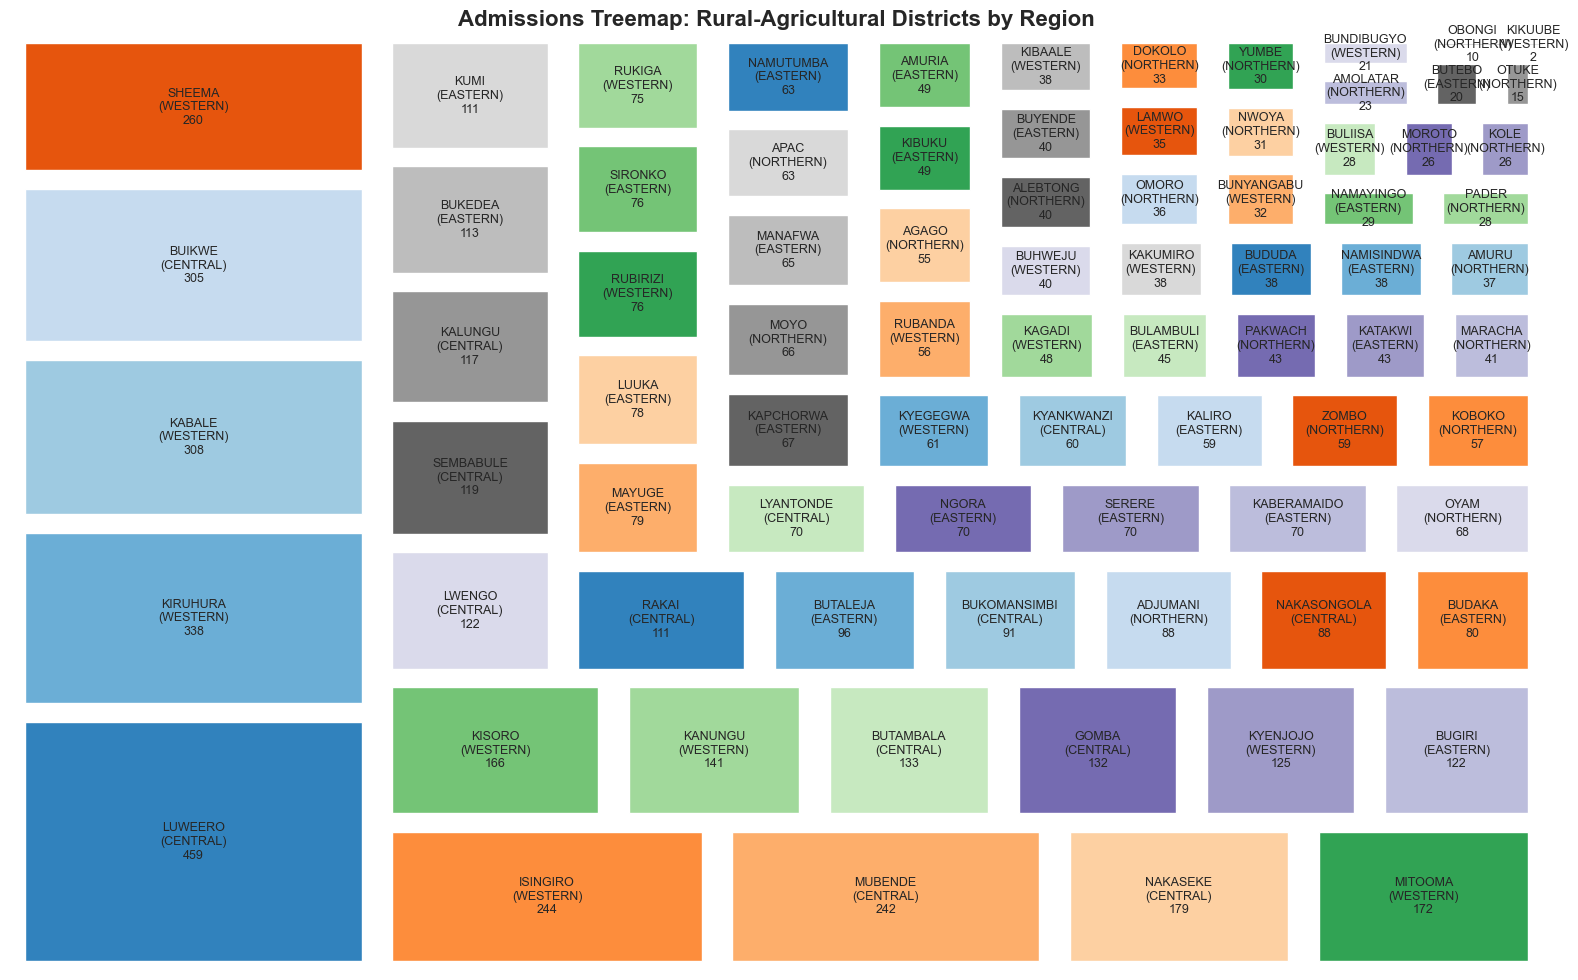

In [25]:
import squarify
import matplotlib.pyplot as plt

# Filter Rural-Agricultural cluster
rural_df = df[df['cluster'] == 'RURAL-AGRICULTURAL']
rural_counts = rural_df.groupby(['region', 'dname']).size().reset_index(name='admissions')
rural_counts = rural_counts.sort_values(by='admissions', ascending=False)

# Generate labels
rural_counts['label'] = rural_counts['dname'] + "\n(" + rural_counts['region'] + ")\n" + rural_counts['admissions'].astype(str)

# Plot
plt.figure(figsize=(16, 10))
squarify.plot(
    sizes=rural_counts['admissions'],
    label=rural_counts['label'],
    color=plt.cm.tab20c.colors * 10,  # Extend color palette
    pad=True,
    text_kwargs={'fontsize': 9}
)

plt.title('Admissions Treemap: Rural-Agricultural Districts by Region', fontsize=16, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


In [26]:
# Filter Remote-Underdeveloped cluster
remote_df = df[df['cluster'] == 'REMOTE-UNDERDEVELOPED']
remote_counts = remote_df.groupby(['region', 'dname']).size().reset_index(name='admissions')
remote_counts = remote_counts.sort_values(by='admissions', ascending=False)

# Generate labels
remote_counts['label'] = remote_counts['dname'] + "\n(" + remote_counts['region'] + ")\n" + remote_counts['admissions'].astype(str)

# Plot
plt.figure(figsize=(16, 10))
squarify.plot(
    sizes=remote_counts['admissions'],
    label=remote_counts['label'],
    color=plt.cm.PuBuGn.colors * 10,  # Different but soft palette
    pad=True,
    text_kwargs={'fontsize': 9}
)

plt.title('🏔️ Admissions Treemap: Remote-Underdeveloped Districts by Region', fontsize=16, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


AttributeError: 'LinearSegmentedColormap' object has no attribute 'colors'

<Figure size 1600x1000 with 0 Axes>

C:\Users\User\AppData\Local\Temp\ipykernel_9772\3380900857.py:30: UserWarning:

Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from current font.

C:\Users\User\AppData\Local\Temp\ipykernel_9772\3380900857.py:30: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127956 (\N{SNOW CAPPED MOUNTAIN}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from current font.



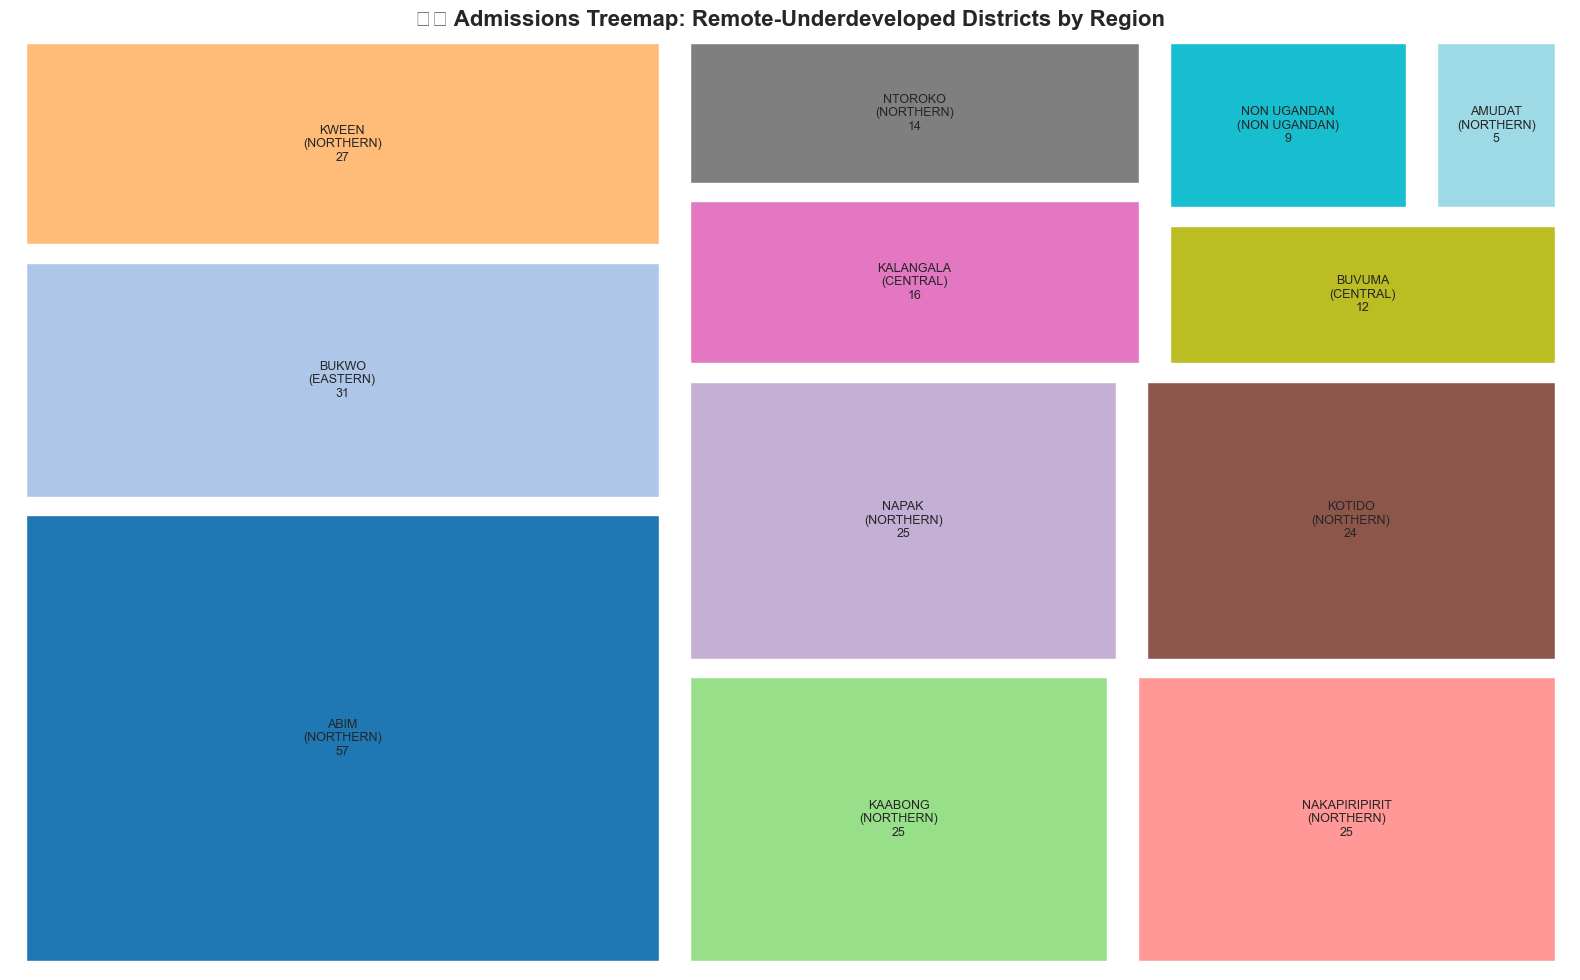

In [ ]:
import matplotlib.pyplot as plt
import squarify
import matplotlib.cm as cm
import numpy as np

# Filter Remote-Underdeveloped cluster
remote_df = df[df['cluster'] == 'REMOTE-UNDERDEVELOPED']
remote_counts = remote_df.groupby(['region', 'dname']).size().reset_index(name='admissions')
remote_counts = remote_counts.sort_values(by='admissions', ascending=False)

# Generate labels
remote_counts['label'] = remote_counts['dname'] + "\n(" + remote_counts['region'] + ")\n" + remote_counts['admissions'].astype(str)

# Use a colorful, varied palette
color_count = len(remote_counts)
colors = plt.cm.tab20(np.linspace(0, 1, color_count))  # tab20 gives 20 distinct colors, we can interpolate

# Plot
plt.figure(figsize=(16, 10))
squarify.plot(
    sizes=remote_counts['admissions'],
    label=remote_counts['label'],
    color=colors,
    pad=True,
    text_kwargs={'fontsize': 9}
)

plt.title('Admissions Treemap: Remote-Underdeveloped Districts by Region', fontsize=16, weight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9772\3739748973.py:27: UserWarning:

Glyph 127853 (\N{LOLLIPOP}) missing from current font.



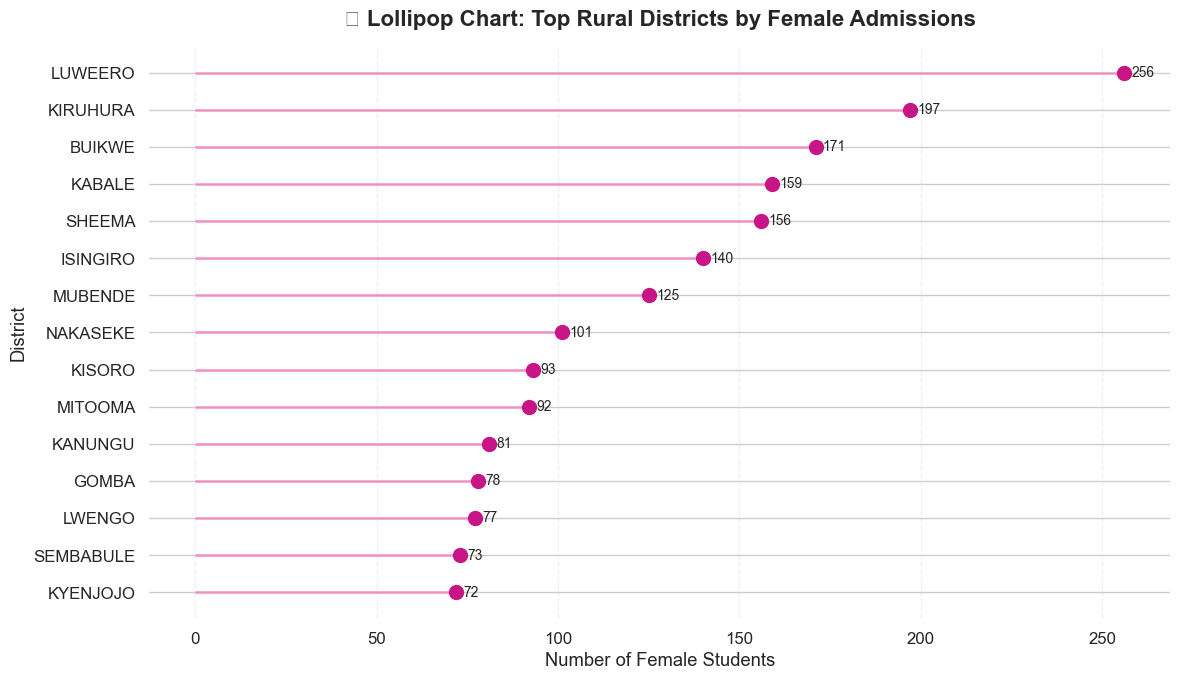

In [ ]:
import matplotlib.pyplot as plt

# Prepare sorted data
female_counts_sorted = female_counts.sort_values()

# Create figure
plt.figure(figsize=(12, 7))

# Plot the stem lines
plt.hlines(y=female_counts_sorted.index, xmin=0, xmax=female_counts_sorted.values, color='#FF69B4', alpha=0.6, linewidth=2)

# Plot the dots
plt.plot(female_counts_sorted.values, female_counts_sorted.index, "o", markersize=10, color='#C71585')

# Add value labels
for i, value in enumerate(female_counts_sorted.values):
    plt.text(value + 2, female_counts_sorted.index[i], str(value), va='center', fontsize=10)

# Titles and labels
plt.title('🍭 Lollipop Chart: Top Rural Districts by Female Admissions', fontsize=16, weight='bold', pad=15)
plt.xlabel('Number of Female Students')
plt.ylabel('District')

# Aesthetic tweaks
plt.grid(axis='x', linestyle='--', alpha=0.3)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9772\3473299695.py:34: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.



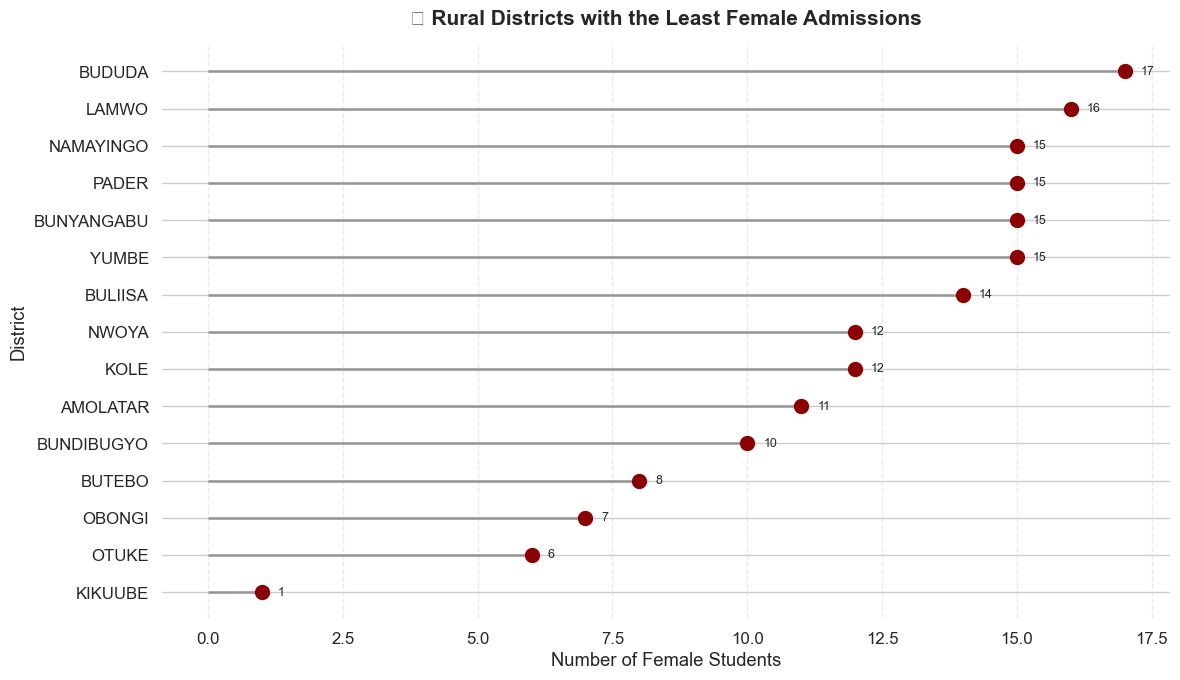

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for rural districts and female students
rural_female_df = df[
    (df['cluster'] == 'RURAL-AGRICULTURAL') &
    (df['ge'].str.upper() == 'F')
]

# Count female admissions per rural district and get the bottom 15
least_female_counts = rural_female_df['dname'].value_counts().nsmallest(15).sort_values()

# Plot
plt.figure(figsize=(12, 7))
y_pos = range(len(least_female_counts))

# Draw stem lines
plt.hlines(y=y_pos, xmin=0, xmax=least_female_counts.values, color='gray', alpha=0.7, linewidth=2)

# Draw dots
plt.plot(least_female_counts.values, y_pos, "o", markersize=10, color='darkred')

# Add text labels
for i, value in enumerate(least_female_counts.values):
    plt.text(value + 0.3, i, str(value), va='center', fontsize=9)

# Format plot
plt.yticks(y_pos, least_female_counts.index)
plt.title('🔍 Rural Districts with the Least Female Admissions', fontsize=15, weight='bold', pad=15)
plt.xlabel('Number of Female Students')
plt.ylabel('District')
plt.grid(axis='x', linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_9772\1794005076.py:28: UserWarning:

Glyph 128104 (\N{MAN}) missing from current font.

C:\Users\User\AppData\Local\Temp\ipykernel_9772\1794005076.py:28: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from current font.

C:\Users\User\AppData\Local\Temp\ipykernel_9772\1794005076.py:28: UserWarning:

Glyph 128105 (\N{WOMAN}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128104 (\N{MAN}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127891 (\N{GRADUATION CAP}) missing from current font.

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128105 (\N{WOMAN}) missing from current font.



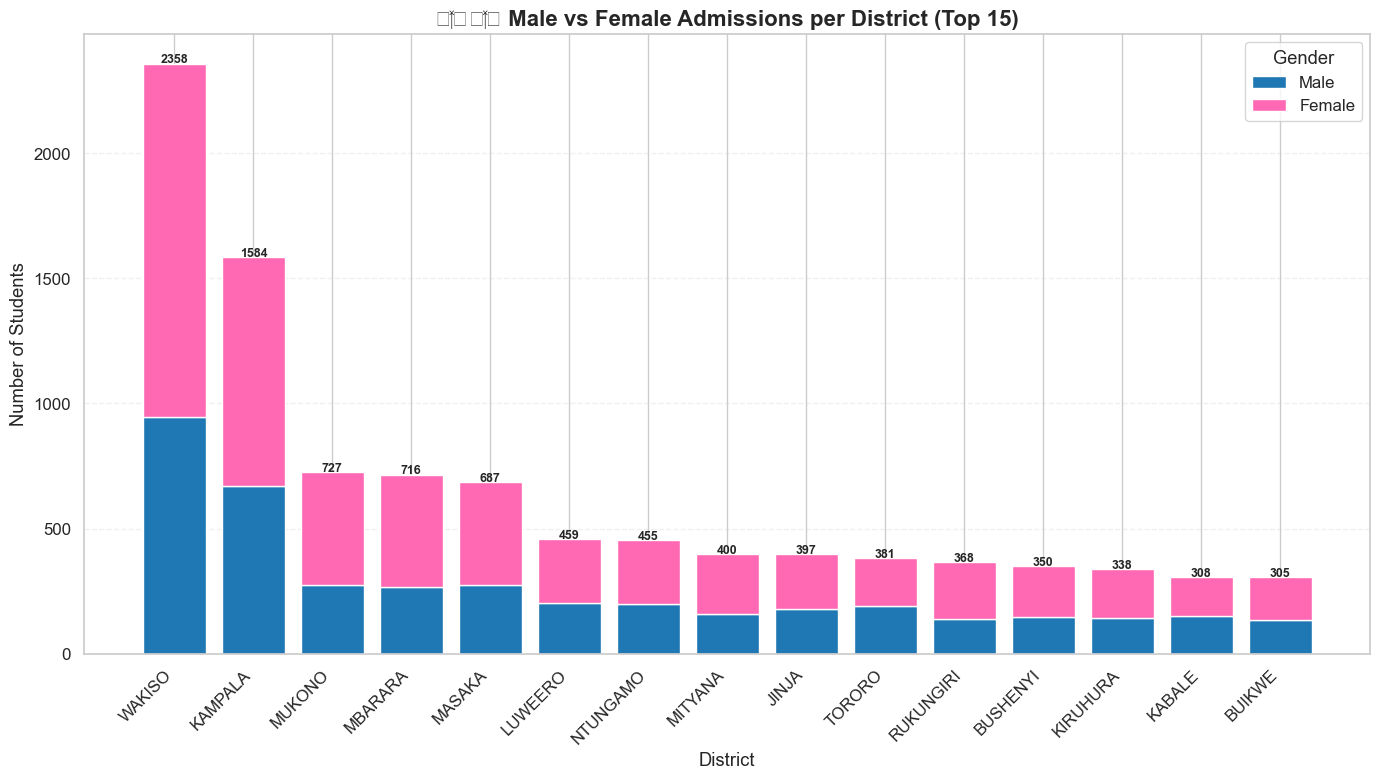

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate male and female counts per district
gender_counts = df.groupby(['dname', 'ge']).size().unstack(fill_value=0)

# Get top 15 districts by total admissions
top15 = gender_counts.sum(axis=1).sort_values(ascending=False).head(15)
gender_top15 = gender_counts.loc[top15.index]

# Plot
plt.figure(figsize=(14, 8))
bars_male = plt.bar(gender_top15.index, gender_top15.get('M', 0), label='Male', color='#1f77b4')
bars_female = plt.bar(gender_top15.index, gender_top15.get('F', 0), bottom=gender_top15.get('M', 0), label='Female', color='#ff69b4')

# Add value labels
for i in range(len(gender_top15)):
    total = gender_top15.iloc[i].sum()
    plt.text(i, total + 2, str(total), ha='center', fontsize=9, fontweight='bold')

# Styling
plt.title('👨‍🎓👩‍🎓 Male vs Female Admissions per District (Top 15)', fontsize=16, weight='bold')
plt.ylabel('Number of Students')
plt.xlabel('District')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
